IMPORTING LIBRARIES

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

DATA COLLECTION AND ANALYSIS

In [3]:
insurance_dataset=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/insurance.csv")

In [4]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_dataset.shape

(1338, 7)

In [6]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
#statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-9-a82345a92063>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


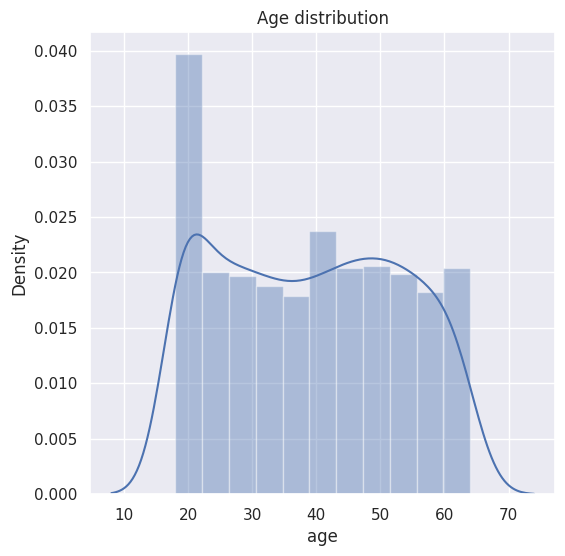

In [9]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age distribution')
plt.show()

<ipython-input-10-97af0f7816bf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


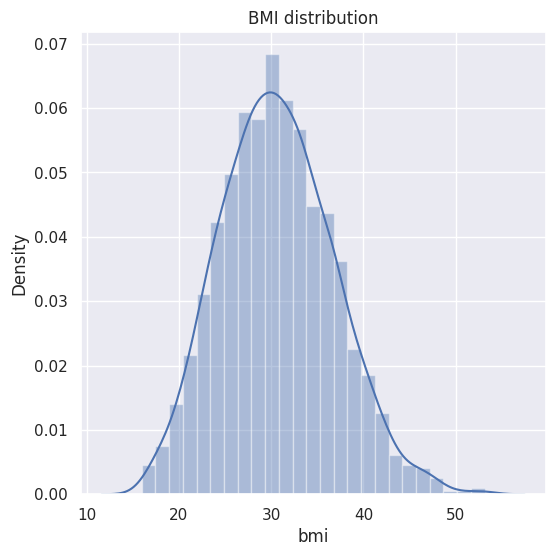

In [10]:
#distribution of bmi
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI distribution')
plt.show()

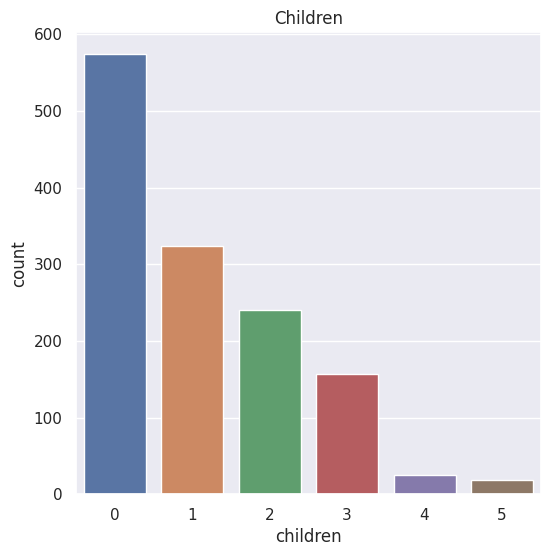

In [11]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [12]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

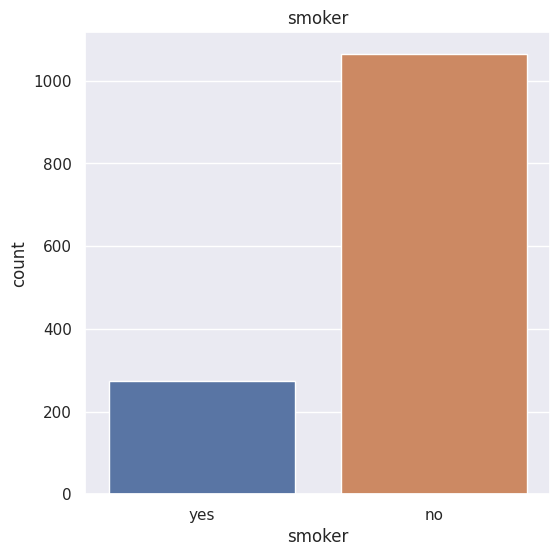

In [13]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [14]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

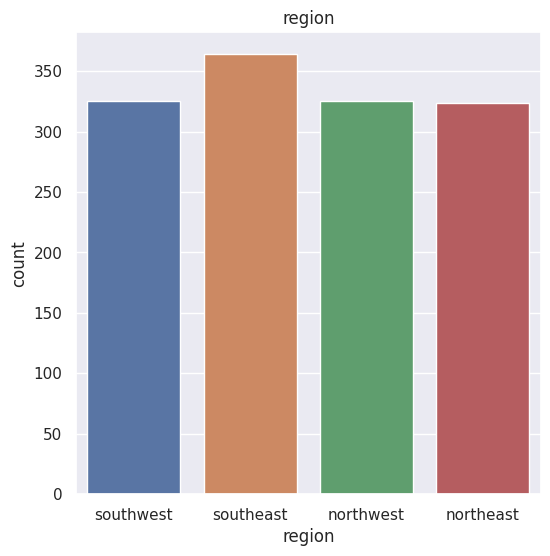

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [15]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()
insurance_dataset['region'].value_counts()

<ipython-input-16-259f9dfd39fa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


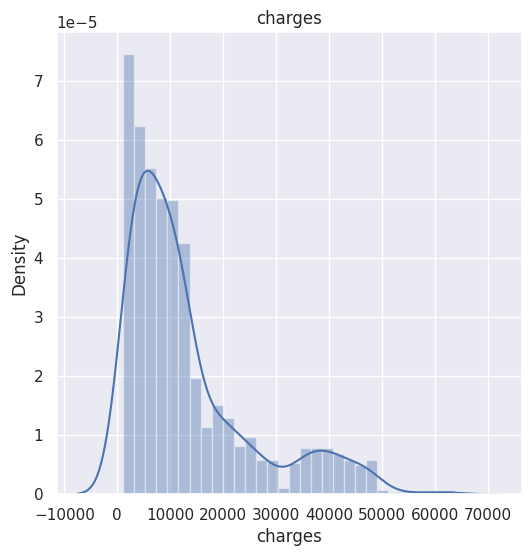

In [16]:
#distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('charges')
plt.show()


In [17]:
insurance_dataset[['sex', 'smoker', 'region']] = insurance_dataset[['sex', 'smoker', 'region']].astype('category')
insurance_dataset.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(insurance_dataset.sex.drop_duplicates())
insurance_dataset.sex = label.transform(insurance_dataset.sex)
label.fit(insurance_dataset.smoker.drop_duplicates())
insurance_dataset.smoker = label.transform(insurance_dataset.smoker)
label.fit(insurance_dataset.region.drop_duplicates())
insurance_dataset.region = label.transform(insurance_dataset.region)
insurance_dataset.dtypes



age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [19]:
x=insurance_dataset.drop(columns='charges', axis=1)
y= insurance_dataset['charges']

In [20]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]


In [21]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


MODEL TRAINING  

linear regression

In [23]:
regressor=LinearRegression()

In [24]:
regressor.fit(x_train,y_train)
training_data_prediction =regressor.predict(x_train)


In [25]:
r2_train = metrics.r2_score(y_train,training_data_prediction)
print('r2 score:',r2_train)

r2 score: 0.7519923667088932


In [26]:
inputdata=(23,1,22.50,0,0,0)

 #changing input data to a numpy array
inputdata_asnumpyarray = np.asarray(inputdata)

  #reshape array
ip_reshaped=inputdata_asnumpyarray.reshape(1,-1)

prediction=regressor.predict(ip_reshaped)
print(prediction)

print('The insurance cost in USD',prediction[0])



[1440.66765637]
The insurance cost in USD 1440.6676563723158


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=10)
ridge.fit(x_train,y_train)

Ridge(alpha=10)

In [28]:
training_ridge = ridge.score(x_train,y_train)
print("training accuracy with ridge ",training_ridge )

training accuracy with ridge  0.7500997945190703


In [29]:
inputdata=(23,1,22.50,0,0,0)

 #changing input data to a numpy array
inputdata_asnumpyarray = np.asarray(inputdata)

  #reshape array
ip_reshaped=inputdata_asnumpyarray.reshape(1,-1)

prediction=regressor.predict(ip_reshaped)
print(prediction)

print('The insurance cost in USD',prediction[0])



[1440.66765637]
The insurance cost in USD 1440.6676563723158


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
